# An Introduction to the Discrete Fourier Transform

# Lecture 3: Aliasing and the Nyquist Frequency

## The following is the exercises for Lecture 3 on the Discrete Fourier Transform. 




## Exercises


In [2]:
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt
from scipy.io import wavfile
%matplotlib notebook

#### Sample from a sinusoid with frequency 8 Hz for L = 1 second at the sampling rate fs = 10 Hz. Create `ts` and `ys` variables to store time and value samples. Remember to use `np.linspace(start, stop, num, endpoint=False)`.

#### Use ax.scatter() to plot the sample points. Then plot the "continuous" version of a 8 Hz sinusoid going through the points(`ys1`). This problem was discussed in the video lecture 3. 

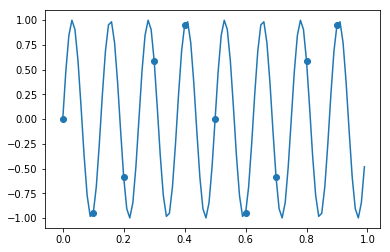

In [3]:
fs = 10 # sampling rate in Hz
L = 1 # second
N = int(fs*L) # number of samples
ts = np.linspace(0,L,N,endpoint=False)
ys = np.sin(2*np.pi*8*ts) # 8 Hz waveform
fig, ax = plt.subplots()
ax.scatter(ts,ys)

# "continuous" version = sample a lot of points
# 8 Hz
ts1 = np.linspace(0,L,100,endpoint=False)
ys1 = np.sin(2*np.pi*8*ts1)
ax.plot(ts1,ys1)

#### Now create three more continous sinusoids(`ys2` and `ys3`) with different frequencies which also pass through the same points, illustrating aliasing. One of these sinusoids should have a negative frequency.

#### Hint: Use $f_0 = f + kf_s$ as discussed in the lecture video.


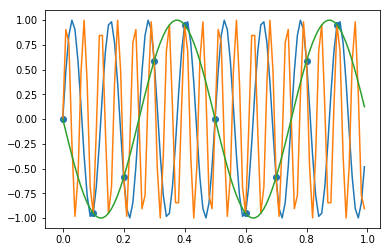

In [4]:
fs = 10 # Hz
L = 1 # second
N = int(fs*L) # number of samples
ts = np.linspace(0,L,N,endpoint=False)
ys = np.sin(2*np.pi*8*ts)
fig, ax = plt.subplots()
ax.scatter(ts,ys)


# 8 Hz
ys1 = np.sin(2*np.pi*8*ts1)
ax.plot(ts1,ys1)

# 18 Hz
ys2 = np.sin(2*np.pi*18*ts1)
ax.plot(ts1,ys2)


# -2 Hz
ys3 = np.sin(2*np.pi*(-2)*ts1)
ax.plot(ts1,ys3)

#### The following two functions are taken from the previous Lecture 1's exercises. It will be helpful to use these functions in the following problems.

In [5]:
def plot_signal_time(ys, t1, t2, fs = 44100):
    """ plots the signal ys on the time domain [t2, t2] 
    at the sampling rate fs. 
    """
    N = ys.size # num of samples
    L = N/fs # duration of audio clip
    ts = np.linspace(0,L,N) # array of N equally spaced values from [0,L]
    fig, ax = plt.subplots()
    ax.plot(ts, ys)
    ax.set_xlim(t1, t2)
    ax.set_xlabel("Time(in seconds)")



In [6]:
def plot_signal_frequency(ys, f1, f2, fs = 44100):
    """ plots the signal ys on the frequency domain [f1, f2] 
    at the sampling rate fs. 
    """
    N = ys.size
    L = N/fs
    yk = np.fft.fft(ys)
    k = np.arange(N) # 0 to N-1
    freqs = k/L
    fig, ax = plt.subplots()
    ax.plot(freqs, np.abs(yk))
    ax.set_xlim(f1,f2)
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("|yk|")


#### Sample from a sinusoid with frequency 50 Hz with a sampling rate of fs = 120 Hz for 1 second.  

In [15]:
fs = 120 # Hz
L = 1 # second
N = int(fs*L) # number of samples
ts = np.linspace(0,L,N,endpoint=False)
ys = np.sin(2*np.pi*50*ts)


#### What is the Nyquist frequency?

#### Answer: 60 Hz. This means that the DFT can only detect frequencies up to 60 Hz. After 60 Hz are the aliased(negative) frequencies

#### Plot its frequency domain representation. Does the DFT detect the 50 Hz component?

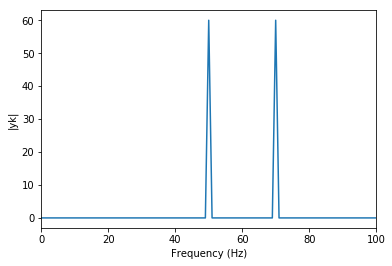

In [16]:
plot_signal_frequency(ys, 0, 100, fs = 120)

### Note that the DFT detected the 50 Hz frequency along with its aliased symmetric frequency, -50 Hz or 120 - 50 = 70 Hz. 

#### Redo the problem by sampling from the same sinusoid with frequency 50 Hz but this time with a sampling rate of fs = 80 Hz for 1 second.  What is the Nyquist frequency?

#### Answer: 40 Hz

#### Plot its frequency domain representation. Does the DFT now detect the 50 Hz component? What happened to that component? What is the aliased frequency that the DFT detect? This problem illustrate aliasing and how a 50 Hz signal that is larger than the Nyquist frequency is distorted to look like a lower aliased frequency. 



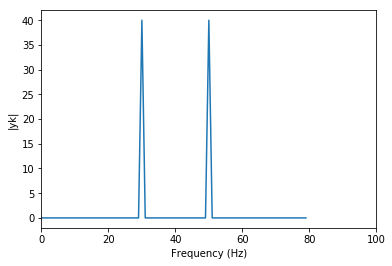

In [17]:
fs = 80 # Hz
L = 1 # second
N = int(fs*L) # number of samples
ts = np.linspace(0,L,N,endpoint=False)
ys = np.sin(2*np.pi*50*ts)
plot_signal_frequency(ys, 0, 100, fs = 80)

### Answer: Note that above, even though there is a 50 Hz frequency, only the aliased, lower 30 Hz frequency(and its negative -30 Hz or 80 - 30 = 50 Hz) showed up. Remember that everything after 40 Hz is aliased. 

### This is why a sampling of 44100 Hz is needed to ensure that all frequencies in the human hearing range 20-20000 Hz is properly recorded. 